# Build Simple SMV Model

In [117]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

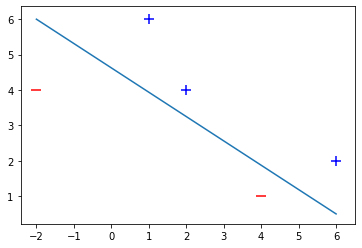

In [118]:
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1,6,-1],
    [2,4,-1],
    [6,2,-1]
])

y = np.array([-1,-1,1,1,1])

for d, sample in enumerate(X):
    if d < 2:
        plt.scatter(sample[0],sample[1],color='r',s=120,marker='_',linewidths=3)
    else :
        plt.scatter(sample[0],sample[1],color='b',s=120,marker='+',linewidths=3)
        
plt.plot([-2,6],[6,0.5])

In [119]:
# Hinge loss: max(0,1-y*y_pred)
# Objective Function: min(lambd*w^2)+sum(Hinge loss)

def svm_gradient_descient(X, y, learning_rate = 0.1, epochs = 2000):
    w = np.zeros(len(X[0]))
    errors = []
    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            if (y[i]*(np.dot(X[i], w))) < 1:
#                 misclassified
                w = w + learning_rate * ((X[i] * y[i]) + (-2 * (1/epoch) * w))
                error = 1
            else:
#                 correct
                w = w + learning_rate * (-2 * (1/epoch) * w)
        errors.append(error)
        
        if epoch % 500 == 0:
            print("weights: ",w)
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()

    return w        
                

weights:  [ 1.60875151  2.52004791 10.4849879 ]
weights:  [1.19648651 2.16854441 8.16420921]
weights:  [ 1.62939488  3.06124743 11.22246675]
weights:  [ 1.61356718  3.07971102 11.15860458]
weights:  [ 1.46601211  2.82359421 10.16196217]
weights:  [4.9797723  8.85767211 9.74527861]
weights:  [ 1.73945341  3.38830969 12.09269934]
weights:  [ 1.87099598  3.6572693  13.01896242]
weights:  [1.16314085 2.27716445 8.09677426]
weights:  [ 1.65150141  3.24235768 11.5047173 ]
weights:  [1.28357367 2.52318981 8.94458534]
weights:  [1.08354994 2.13249343 7.55302723]
weights:  [ 1.97322157  3.89162482 13.76216343]
weights:  [ 1.89231926  3.7356059  13.20117364]
weights:  [ 1.90936786  3.7725907  13.32317487]
weights:  [1.00134625 1.97849226 6.98718745]
weights:  [1.09806705 2.1713813  7.663729  ]
weights:  [1.24629232 2.46638008 8.69997572]
weights:  [ 1.45807571  2.88755404 10.18026517]


C:\Users\83409\.conda\envs\deepLearning\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


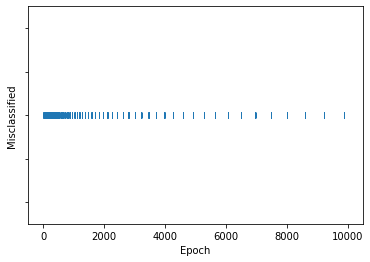

In [120]:
w = svm_gradient_descient(X,y,learning_rate = 1,epochs = 10000)

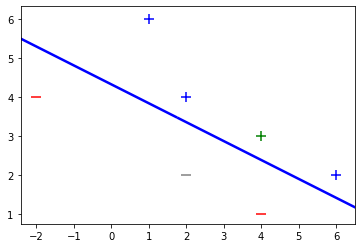

In [121]:
# plot the hyperplane
for d, sample in enumerate(X):
    if d < 2:
        plt.scatter(sample[0],sample[1],color='r',s=120,marker='_',linewidths=3)
    else :
        plt.scatter(sample[0],sample[1],color='b',s=120,marker='+',linewidths=3)
        
plt.scatter(2,2, s=120, marker='_',linewidths=3,color = 'gray')
plt.scatter(4,3, s=120, marker='+',linewidths=3,color = 'green')

x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')